# Sentiment Analysis on Times of India News Headline
**Task Members- 1. `Shweta Kulkarni` 2. `Suraj Honkamble`**

### Import Basic Required Packages and Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Read and Understand the Data

In [2]:
df=pd.read_csv('D:\\DATA SCIENCE Internship with Innomatics\\sentiment_analysis_on_news\\resources\\data\\Times_of_India_Healines.csv')
df.head()

,index,Unnamed: 0,S_No,URL,Date,Headline,Headline Link,Positive,Negative,Neutral,Compound
0,0,0,0,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,Shivin Narang injures his hand on the set of h...,http://timesofindia.indiatimes.com//tv/news/hi...,24.2,0.0,75.8,49.39
1,1,1,1,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,Allergy cases on the rise in Bengaluru,http://timesofindia.indiatimes.com//life-style...,0.0,0.0,100.0,0.00
2,2,2,2,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,A grand Hanukkah celebration held in the city,http://timesofindia.indiatimes.com//city/benga...,33.3,0.0,66.7,45.88
3,3,3,3,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,"I respect my competitors, because they bring o...",http://timesofindia.indiatimes.com//entertainm...,42.2,0.0,57.8,80.74
4,4,4,4,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,Strong New Year resolutions keep young minds m...,http://timesofindia.indiatimes.com//life-style...,51.2,0.0,48.8,74.30


### Column Information

1. **S_No: Unique numerical identifier for each headline. (Integer)**
2. **URL: The URL associated with each headline. (String)**
3. **Date: Date of publication for the story. (Date)**
4. **Headline: Title of the news article provided by Times Of India newspaper headliner. (String)**
5. **Headline Link: Link to the news article associated with this headline. (String)**
6. **Positive: Sentiment score between 0 and 100 indicating the degree of positive sentiment in the headline. (Float)**
7. **Negative: Sentiment score between 0 and 100 indicating the degree of negative sentiment in the headline. (Float)**
8. **Neutral: Sentiment score between 0 and 100 indicating the degree of neutral sentiment in the headline. (Float)**
9. **Compound: Overall sentiment score for each headline ranging from -100 (most extreme negative) to +100 (most extreme positive). (Float)**

In [3]:
df.shape

(50012, 11)

In [4]:
df.columns

Index(['index', 'Unnamed: 0', 'S_No', 'URL', 'Date', 'Headline',
       'Headline Link', 'Positive', 'Negative', 'Neutral', 'Compound'],
      dtype='object')

In [5]:
df.dtypes

index              int64
Unnamed: 0         int64
S_No               int64
URL               object
Date              object
Headline          object
Headline Link     object
Positive         float64
Negative         float64
Neutral          float64
Compound         float64
dtype: object

### For Further Sentiment Analysis I am going to use News Headlines only...
- We dont know how the polarities(positive, negative and neutral) are defined for each headlines, so here we are not going use these already created polarities, instead we are going to create Sentiment class using the sentiment polarity score by using TextBlob.

In [6]:
pd.options.display.max_colwidth=10000
data=df[['Headline']]
data.head()

,Headline
0,Shivin Narang injures his hand on the set of his show
1,Allergy cases on the rise in Bengaluru
2,A grand Hanukkah celebration held in the city
3,"I respect my competitors, because they bring out the best in me: Yash"
4,Strong New Year resolutions keep young minds motivated


### Check the Unique Headlines

In [7]:
print("Number of Unique News Headlines are:", data['Headline'].nunique())

Number of Unique News Headlines are: 48221


### Duplicated news Headlines

In [8]:
print(f"There are {data.duplicated().sum()} duplicate news headlines in Times of India.")

There are 1791 duplicate news headlines in Times of India.


### Drop duplicate News Headlines

In [9]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

## Text Preprocessing
### Level 1 Technique:
    1. Removal of numbers
    2. Removal of symbols and special characters
    3. Making text in lower case
    4. Removing the commonly occurring words
### Level 2 Technique: Language based techniques
    1. POS Tagging
    2. Stemming
    3. Lemmatization
    4. Stop words removal

### Stopwords Removal

In [10]:
from nltk.corpus import stopwords
stopword=stopwords.words('english')
print("Total Stopwords in English Language are:", len(stopword))

Total Stopwords in English Language are: 179


**We are going to remove these 179 stops words from our corpus**

### Stemming and Lemmatization

In [11]:
import re
from nltk.stem import  PorterStemmer, WordNetLemmatizer
stem=PorterStemmer()
lemma=WordNetLemmatizer()

### Steps to preproccess text data
1. convert to lower case
2. Tokenization
3. substitute for any special characters
4. stopword removal
5. Stemming/ Lemmatization

### Create function to above procedure

In [12]:
def clean_text(text):
    text=str(text).lower()
    text=re.sub(pattern="[^a-zA-z]", repl=" ", string=text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [lemma.lemmatize(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

#Apply the function to Headline
data['Clean_Headline']=data['Headline'].apply(clean_text)
data.head()

,Headline,Clean_Headline
0,Shivin Narang injures his hand on the set of his show,shivin narang injures hand set show
1,Allergy cases on the rise in Bengaluru,allergy case rise bengaluru
2,A grand Hanukkah celebration held in the city,grand hanukkah celebration held city
3,"I respect my competitors, because they bring out the best in me: Yash",respect competitor bring best yash
4,Strong New Year resolutions keep young minds motivated,strong new year resolution keep young mind motivated


**We can clearly observe the difference between Headline and Clean Headline colulmn.**

### Store this User defined function to clean the text in the pickle file so that we can utilize it during streamlit application developement

In [ ]:
import pickle
path='D:\\DATA SCIENCE Internship with Innomatics\\sentiment_analysis_timesnow_news_heading\\resources\\clean_text_func\\clean_text.pkl'
pickle.dump(clean_text, open(path, 'wb'))

### Create Target Variable
- We are not using the target variables which are created by default.. So we need to create the Target Variable, in the case the `Sentiments`.

In [13]:
import textblob
from textblob import TextBlob

In [14]:
data['Polarity']=[TextBlob(sentence).sentiment[0] for sentence in data['Headline']]
data.head()

,Headline,Clean_Headline,Polarity
0,Shivin Narang injures his hand on the set of his show,shivin narang injures hand set show,0.000000
1,Allergy cases on the rise in Bengaluru,allergy case rise bengaluru,0.000000
2,A grand Hanukkah celebration held in the city,grand hanukkah celebration held city,0.500000
3,"I respect my competitors, because they bring out the best in me: Yash",respect competitor bring best yash,1.000000
4,Strong New Year resolutions keep young minds motivated,strong new year resolution keep young mind motivated,0.223232


#### Creating Sentiment column from Polarities.
1. **If the polarity is negative then sentiment is "Negative".**
2. **If the polarity is positive then sentiment is "Positive".**
3. **If the polarity is zero then sentiment is "Neutral".**

In [15]:
def sentiment(polarity):
    if polarity==0:
        return 'Neutral'
    elif polarity>0:
        return "Positive"
    else:
        return "Negative"


data['Sentiment']=data['Polarity'].apply(sentiment)
data.head()

,Headline,Clean_Headline,Polarity,Sentiment
0,Shivin Narang injures his hand on the set of his show,shivin narang injures hand set show,0.000000,Neutral
1,Allergy cases on the rise in Bengaluru,allergy case rise bengaluru,0.000000,Neutral
2,A grand Hanukkah celebration held in the city,grand hanukkah celebration held city,0.500000,Positive
3,"I respect my competitors, because they bring out the best in me: Yash",respect competitor bring best yash,1.000000,Positive
4,Strong New Year resolutions keep young minds motivated,strong new year resolution keep young mind motivated,0.223232,Positive


In [16]:
data['Sentiment'].value_counts()

Neutral     32018
Positive    10024
Negative     6179
Name: Sentiment, dtype: int64

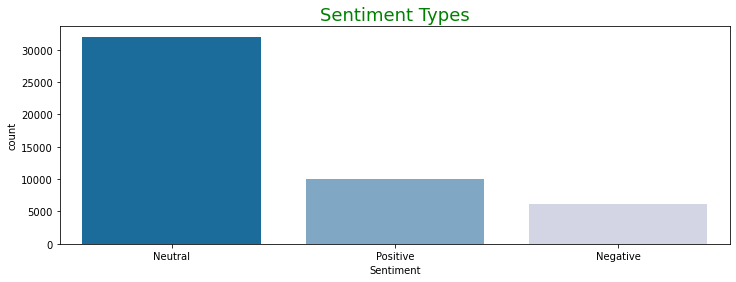

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,4))
sns.countplot(data['Sentiment'], palette='PuBu_r');
plt.title('Sentiment Types', color='green', fontsize=18);

### We can see target class imbalanace so lets reduce the rows in the higher classes

In [18]:
pos=data[data['Sentiment']=='Positive']
neg=data[data['Sentiment']=='Negative']
neu=data[data['Sentiment']=='Neutral']

#creating random sample of equal count
pos_under = pos.sample(6179)
neu_under = neu.sample(6179)

data= pd.concat([pos_under, neu_under, neg], axis=0)
data['Sentiment'].value_counts()

Positive    6179
Neutral     6179
Negative    6179
Name: Sentiment, dtype: int64

### Plot the Word Cloud for Positive Sentiment Highlighing words

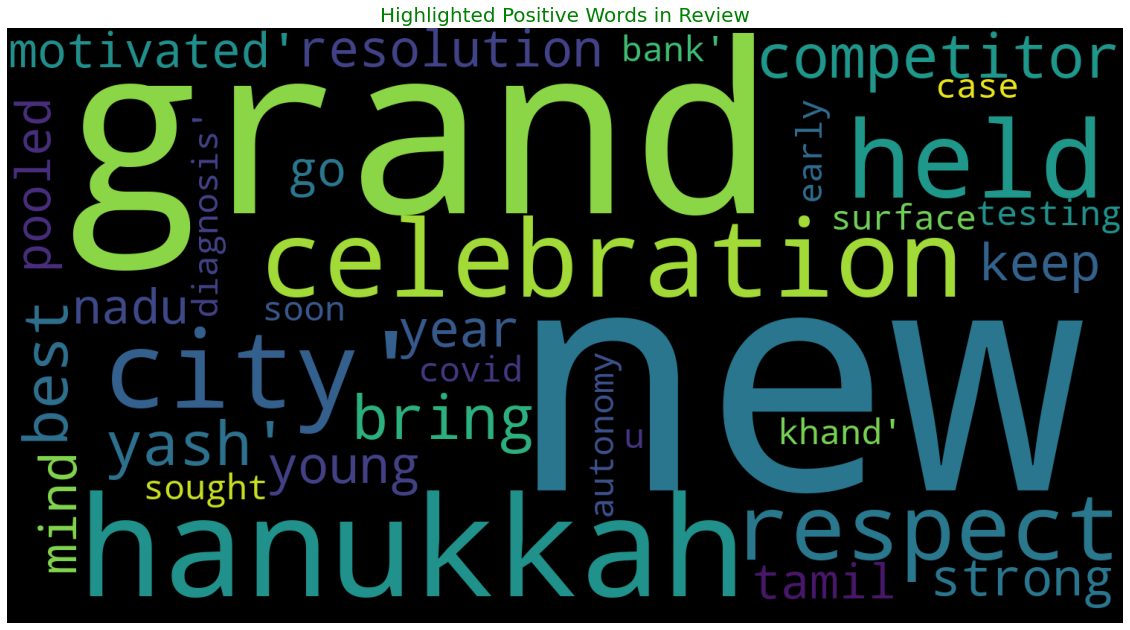

In [ ]:
from wordcloud import WordCloud
graph=data[data['Sentiment']=='Positive']
headlines=graph['Clean_Headline'].values
word_cloud=WordCloud(max_words=50000, width=1500,height=800).generate_from_text(str(headlines))
plt.figure(figsize=(20,12))
plt.imshow(word_cloud)
plt.title("Highlighted Positive Words in Review", color='green', fontsize=20)
plt.axis('off');

### Plot the Word Cloud for Negative Sentiment Highlighing words

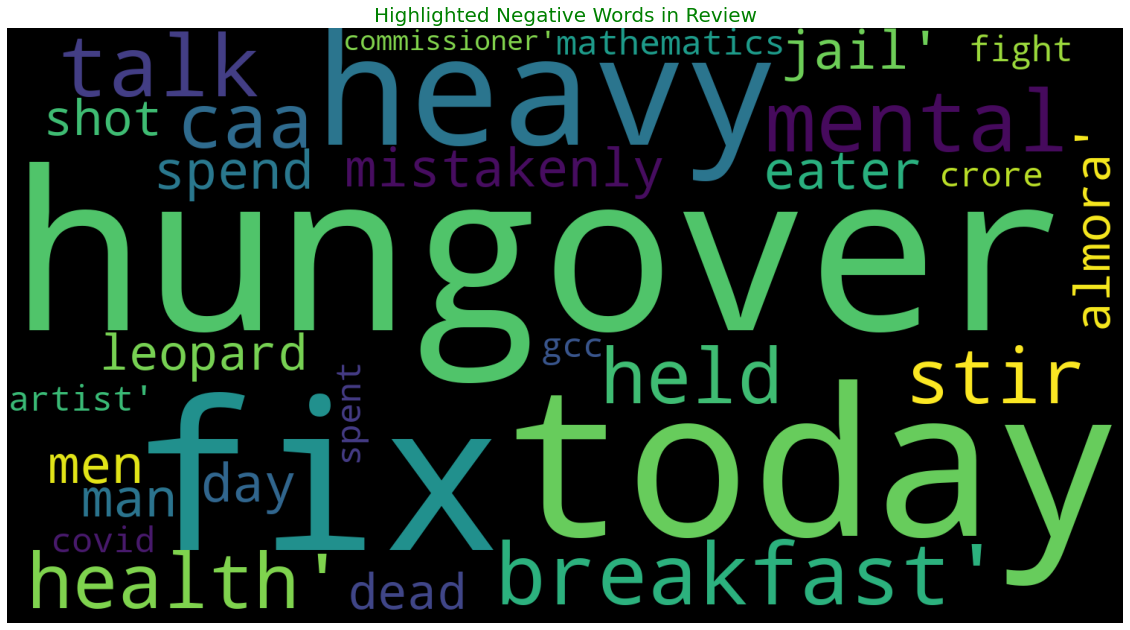

In [ ]:
graph=data[data['Sentiment']=='Negative']
headlines=graph['Clean_Headline'].values
word_cloud=WordCloud(max_words=50000, width=1500,height=800).generate_from_text(str(headlines))
plt.figure(figsize=(20,12))
plt.imshow(word_cloud)
plt.title("Highlighted Negative Words in Review", color='green', fontsize=20)
plt.axis('off');

### Plot the Word Cloud for Neutral Sentiment Highlighing words

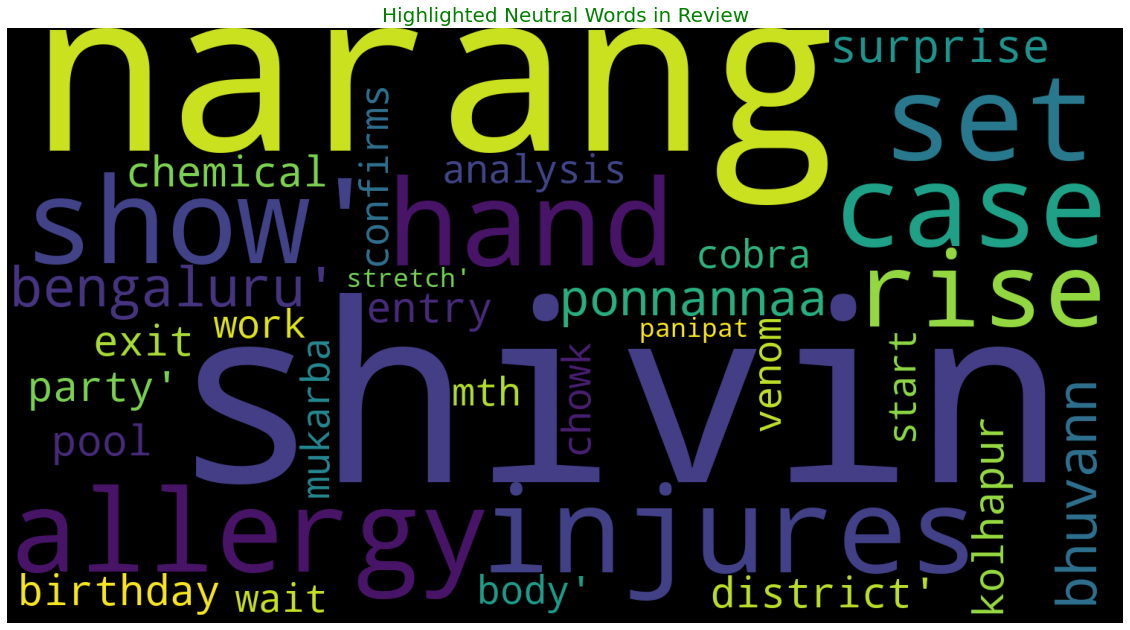

In [ ]:
graph=data[data['Sentiment']=='Neutral']
headlines=graph['Clean_Headline'].values
word_cloud=WordCloud(max_words=50000, width=1500,height=800).generate_from_text(str(headlines))
plt.figure(figsize=(20,12))
plt.imshow(word_cloud)
plt.title("Highlighted Neutral Words in Review", color='green', fontsize=20)
plt.axis('off');

## Machine Learning Classification Model

### Seperate Input and Output features

In [19]:
data['Sentiment_Class']=data['Sentiment'].replace({"Neutral":0,"Positive":1, "Negative":2})
data['Sentiment_Class'].unique()

array([1, 0, 2], dtype=int64)

In [20]:
X=data['Headline']
y=data['Sentiment_Class']

### Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.2)
print("X train shape=", x_train.shape)
print("X test shape=",x_test.shape)
print("Y train shape=", y_train.shape)
print("Y test shape=", y_test.shape)

X train shape= (14829,)
X test shape= (3708,)
Y train shape= (14829,)
Y test shape= (3708,)


### Convert Input Text to Numeric Using CountVectorizer

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cnt=CountVectorizer()
cnt_fit=cnt.fit(x_train)
x_train_tf=cnt_fit.transform(x_train)

In [23]:
print("Number of features created=",len(cnt_fit.get_feature_names()))

Number of features created= 17128


### Convert this spare matrix Dataframe

In [24]:
x_train_tf_df=pd.DataFrame(x_train_tf.toarray(), columns=cnt_fit.get_feature_names())
x_train_tf_df.head()

,000,000cr,000kg,000t,011,016,021,026,051,052,...,zoom,zooms,zoos,zp,zuari,zuckerberg,zumba,zyada,zydus,école
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Transform the Test data and store it into Dataframe

In [25]:
x_test_tf=cnt_fit.transform(x_test)
x_test_tf_df=pd.DataFrame(x_test_tf.toarray(), columns=cnt_fit.get_feature_names())
x_test_tf_df.head()

,000,000cr,000kg,000t,011,016,021,026,051,052,...,zoom,zooms,zoos,zp,zuari,zuckerberg,zumba,zyada,zydus,école
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Store the Count Vectorizer Fitted object to tranform the text in the pickle file so that we can utilize it during streamlit application developement

In [28]:
import pickle
path='D:\\DATA SCIENCE Internship with Innomatics\\sentiment_analysis_on_news\\resources\\vectorizer\\vectorizer.pkl'
pickle.dump(cnt_fit, open(path, 'wb'))

## Selecting the best Algorithm

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [57]:
models={
    "KNN":KNeighborsClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boosting":GradientBoostingClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "XGBoost":XGBClassifier()}

In [58]:
results=pd.DataFrame()
for name, model in models.items():
    model.fit(x_train_tf,y_train)
    y_pred=model.predict(x_test_tf)
    acc=(accuracy_score(y_test,y_pred)*100).round(4)
    result=pd.DataFrame({"Algorithm Name":[name], "Prediction Accuracy":[acc]})
    results=pd.concat((results,result))
    
results

,Algorithm Name,Prediction Accuracy
0,KNN,72.4002
0,Decision Tree,97.0036
0,Random Forest,96.0083
0,Gradient Boosting,84.7900
0,AdaBoostClassifier,86.5526
0,XGBoost,92.1928


In [30]:
dt=DecisionTreeClassifier()
dt.fit(x_train_tf, y_train)
y_pred=dt.predict(x_test_tf)
acc=accuracy_score(y_test,y_pred)
acc*100

93.39266450916936

In [32]:
confusion_matrix(y_test,y_pred)

array([[1211,   31,   25],
       [  52, 1092,   40],
       [  41,   56, 1160]], dtype=int64)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1267
           1       0.93      0.92      0.92      1184
           2       0.95      0.92      0.93      1257

    accuracy                           0.93      3708
   macro avg       0.93      0.93      0.93      3708
weighted avg       0.93      0.93      0.93      3708



### Store the decision tree model to use later while streamlit application development.

In [34]:
path='D:\\DATA SCIENCE Internship with Innomatics\\sentiment_analysis_on_news\\resources\\model\\decision_tree.pkl'
import pickle
pickle.dump(dt, open(path, 'wb'))